In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Loading movie review dataset
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment', ylabel='count'>

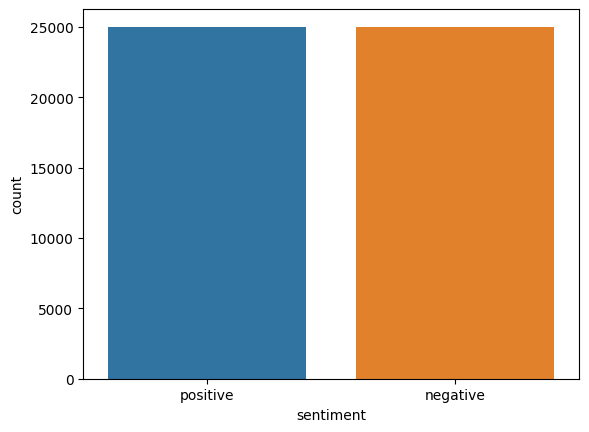

In [4]:
sns.countplot(x='sentiment', data=df)

In [5]:
# Removing stop words and perform stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

df['processed_text'] = df['review'].apply(preprocess_text)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment'], test_size=0.2, random_state=42)

## Using Multinomial Naive Bayes

In [7]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

precision = precision_score(y_test, predictions, pos_label='positive', average='binary')
recall = recall_score(y_test, predictions, pos_label='positive', average='binary')
f1 = f1_score(y_test, predictions, pos_label='positive', average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8597
Precision: 0.870114006514658
Recall: 0.8481841635245089
F1 Score: 0.8590091448095668
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4961
    positive       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [9]:
new_reviews = ["This movie was amazing!", "The acting was terrible.", "Won't let you sleep."]
new_reviews_processed = [preprocess_text(review) for review in new_reviews]

new_predictions = model.predict(new_reviews_processed)
print("New Predictions:", new_predictions)

New Predictions: ['positive' 'negative' 'negative']


## Using Support Vector Machines

In [10]:
from sklearn.svm import LinearSVC

model = make_pipeline(TfidfVectorizer(), LinearSVC())
model.fit(X_train, y_train)

c:\Users\Aamir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC())])

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

precision = precision_score(y_test, predictions, pos_label='positive', average='binary')
recall = recall_score(y_test, predictions, pos_label='positive', average='binary')
f1 = f1_score(y_test, predictions, pos_label='positive', average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.894
Precision: 0.885188770571152
Recall: 0.9073228815241119
F1 Score: 0.8961191689533516
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [12]:
new_reviews = ["This movie was amazing!", "The acting was terrible.", "Won't let you sleep."]
new_reviews_processed = [preprocess_text(review) for review in new_reviews]

new_predictions = model.predict(new_reviews_processed)
print("New Predictions:", new_predictions)

New Predictions: ['positive' 'negative' 'negative']
